In [1]:
import os

import seaborn as sns
import matplotlib.pyplot as plt
import pandas_datareader.data as web

import pandas as pd
import pyfolio as pf

from backtest import analysis as an
from backtest import plot
from backtest.definitions import RESULTS_DATA

pd.options.display.float_format = '{:,.2f}'.format

NAME = "AMAGO_backtest_85long_5short"


infos = ["returns", "nav", "positions", "transactions", "gross_leverage", "benchmark", "drawdown", 
        "position_value", "value", "fund", 
        "attribution", "attribution_factor", "attribution_sectors", "attribution_position",
        "close", "volume", "score", "recommendations"]
        
data = an.import_data(NAME, infos)

returns = data["returns"]
nav = data["nav"]
positions = data["positions"]
transactions = data["transactions"]
gross_leverage = data["gross_leverage"]
benchmark = data["benchmark"]
drawdown = data["drawdown"]
position_value = data["position_value"]
value = data["value"]
fund = data["fund"]
attribution = data["attribution"]
attribution_sectors = data["attribution_sectors"]
attribution_position = data["attribution_position"]
attribution_factor = data["attribution_factor"]
close = data["close"]
volume = data["volume"]
recommendations = data["recommendations"]
score = data["score"]

start = value.index[0]
end = value.index[-1]

# Plot

# Plots the close price vs recommendation for a certain ticker over time
# ticker = "SMTO3"
# plot.price_and_recommendation(ticker, start, end, transactions, recommendations, close, figsize=(20, 5))

# Retrieves the potential long/short candidates on a certain date
# date = "2020-08-14"
# position = "short"
# head = 20
# plot.get_candidates(date, position, recommendations, score, volume, min_volume=0, window=63, head=head)

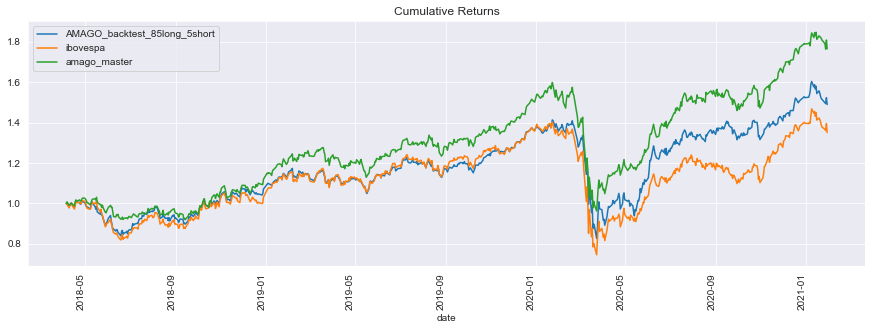

In [2]:
plot.cumulative_returns([nav, benchmark, fund], figsize=(15, 5), name=NAME)

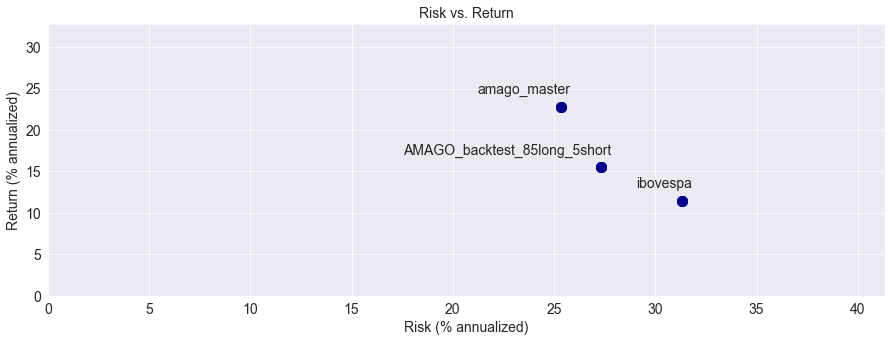

In [3]:
plot.risk_return([nav, fund, benchmark], figsize=(15,5), name=NAME)

In [4]:
plot.return_windows([nav, fund], benchmark, name=NAME)

Percentage of windows overperforming Ibovespa (window lengths in trade days)

days                           10    20    30    40    50    60    70    80    90    120   180   360
AMAGO_backtest_85long_5short 51.31 51.77 51.35 52.58 53.40 52.98 52.71 51.94 51.48 53.98 56.37 71.01
amago_master                 56.54 59.59 62.13 61.55 61.42 64.42 68.15 72.17 76.48 84.43 89.19 94.08
n_size                         688   678   668   658   648   638   628   618   608   578   518   338


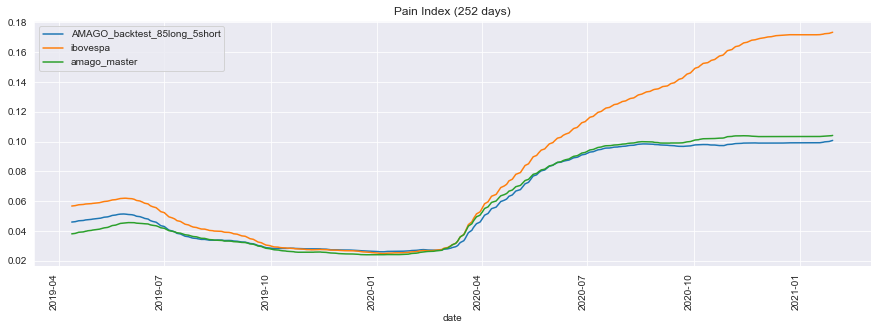

In [5]:
plot.pain_index([nav, benchmark, fund], window=252, figsize=(15, 5), name=NAME)

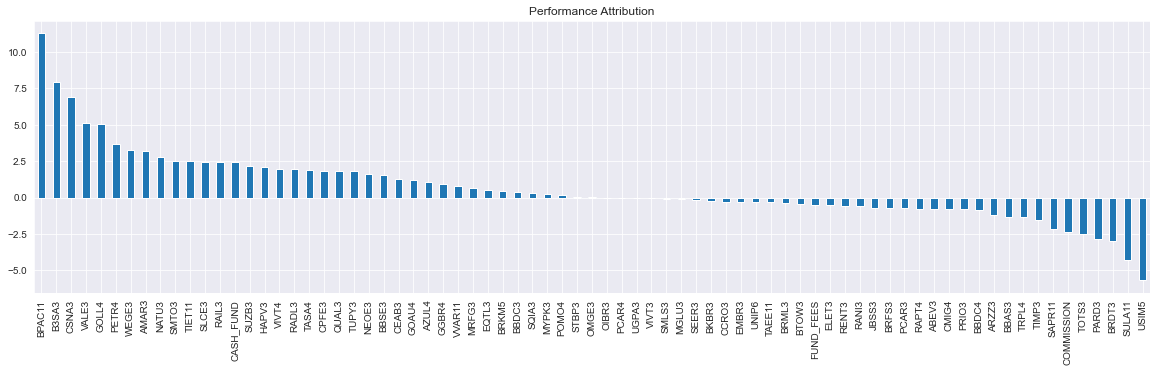

In [6]:
plot.attributions(attribution, figsize=(20, 5), name=NAME, filename="attributions")

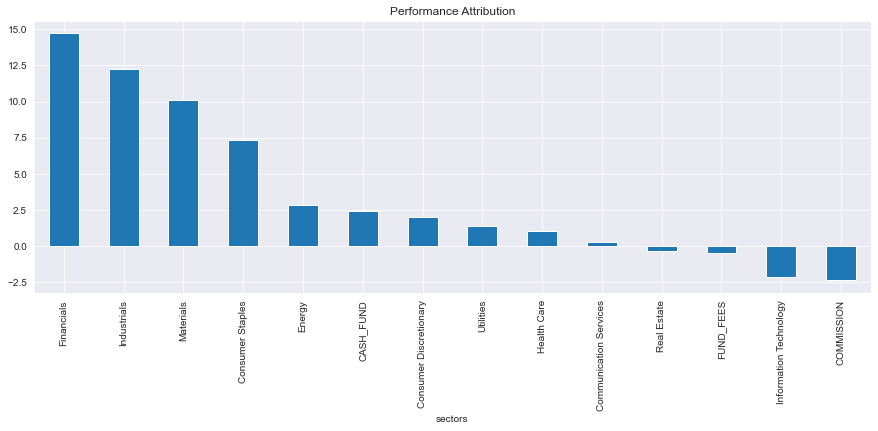

In [7]:
plot.attributions(attribution_sectors, figsize=(15, 5), name=NAME, filename="attribution_sectors")

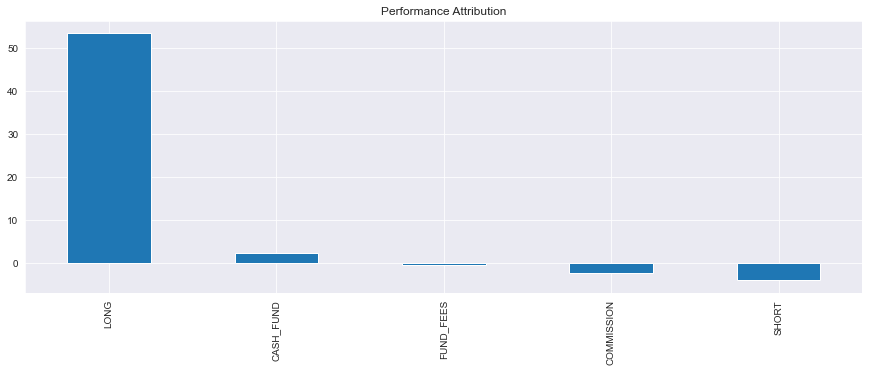

In [8]:
plot.attributions(attribution_position, figsize=(15, 5), name=NAME, filename="attribution_position")

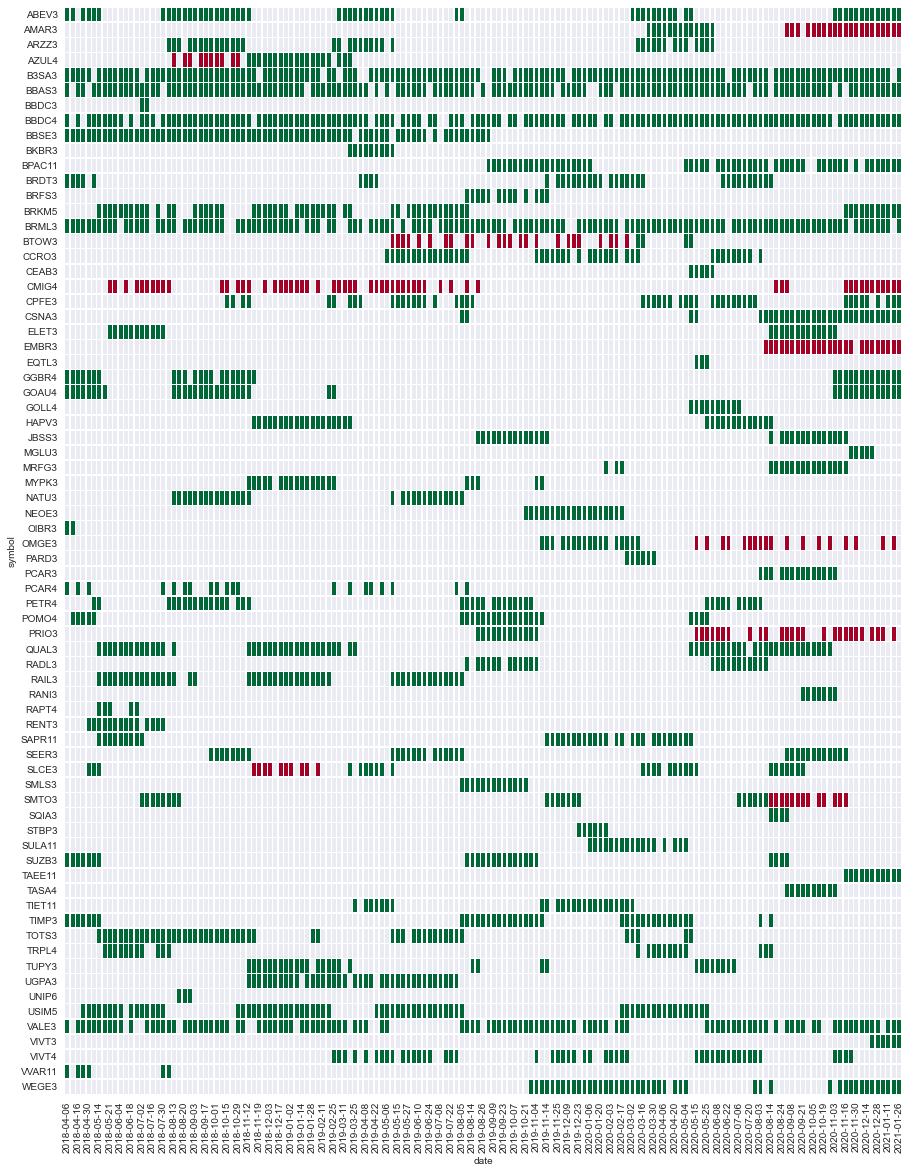

In [9]:
plot.allocations(transactions[transactions.symbol!="CASH_FUND"], figsize=(15, 20)) #larg, altura

Average position during whole period:
 cash    16.98
long    84.86
short   -1.83
dtype: float64


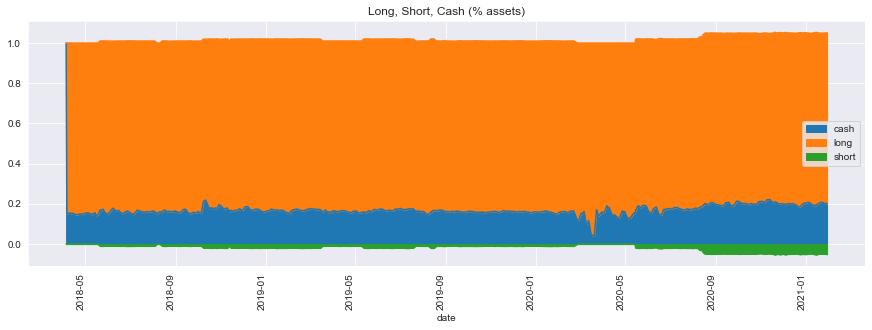

In [10]:
plot.long_short_cash(value.eod, position_value, figsize=(15,5), name=NAME)

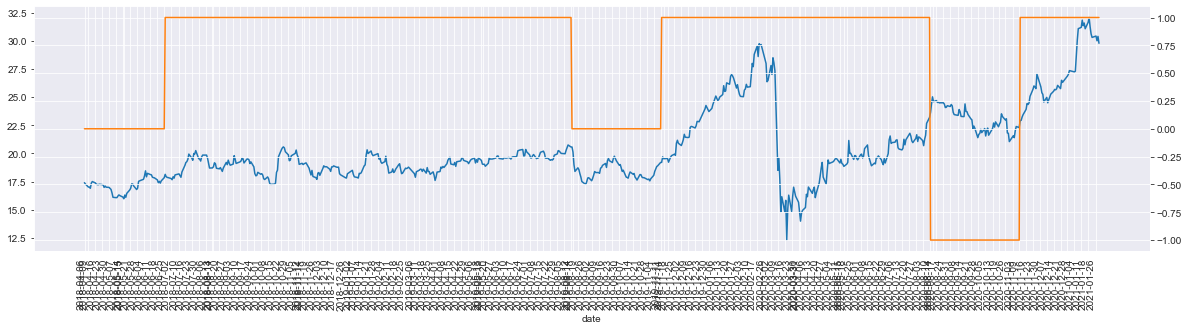

In [11]:
ticker = "SMTO3"
plot.price_and_recommendation(ticker, start, end, 
                              transactions, recommendations, close, 
                              figsize=(20, 5), name=NAME)